In [2]:
import pandas as pd
train_fear_df = pd.read_csv("feartrainalldata.txt","\t")
test_fear_df = pd.read_csv("feartestalldata.txt","\t")

In [3]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'오늘 하루도 수고했어')

[('오늘', 'Noun'), ('하루', 'Noun'), ('도', 'Josa'), ('수고', 'Noun'), ('했어', 'Verb')]

In [4]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [5]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [6]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [7]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [8]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [9]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46308 missing from c

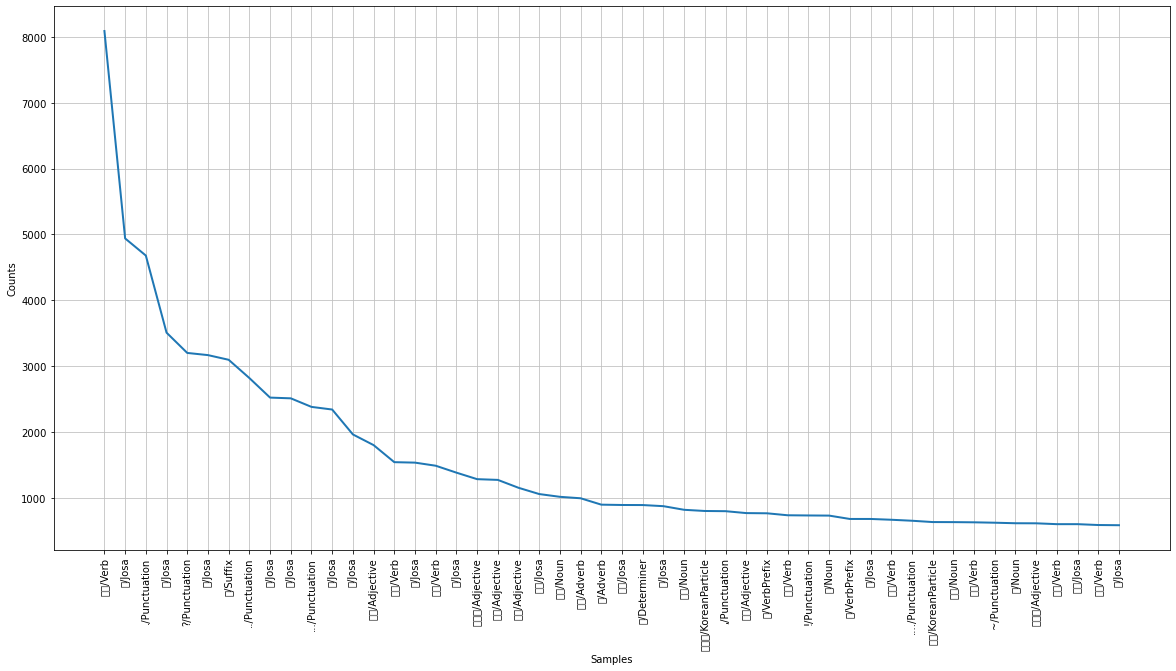

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [11]:
FEAR_FREQUENCY_COUNT = 2000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [12]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [13]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [14]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [15]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [16]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [284]:
fear_model.fit(x_fear_train, y_fear_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0042 - binary_accuracy: 0.9979
Epoch 2/50
53/53 [==============================] - 1s 13ms/step - loss: 0.0041 - binary_accuracy: 0.9978
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0042 - binary_accuracy: 0.9979
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0041 - binary_accuracy: 0.9979
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0041 - binary_accuracy: 0.9979
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0043 - binary_accuracy: 0.9979
Epoch 7/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0041 - binary_accuracy: 0.9979
Epoch 8/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0042 - binary_accuracy: 0.9978
Epoch 9/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0042 - binary_accuracy: 0.9980
Epoch 10/50
53/53 [==============================] - 0

In [285]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

362/362 [==============================] - 0s 1ms/step - loss: 5.1617 - binary_accuracy: 0.8232


In [286]:
fear_results

[5.16172981262207, 0.8231838941574097]

In [287]:
fear_model.save('fear_model.h5')

In [288]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [289]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

1.0

In [354]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    print(f"공포({round(fear_score*100)}%)")
    fear = round(fear_score*100)
    '''
    x = np.arange(1)
    감정 = ['fear']
    정확도 = [fear]
    plt.bar(x, 정확도)
    plt.xticks(x,감정)
    plt.ylim([0,100])
    plt.show()'''

In [355]:
fear_predict("")

공포(31%)


In [25]:
#놀람 감정 분석

In [26]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetrainalldata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestalldata.txt","\t")

In [27]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [28]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [29]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [30]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [31]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [32]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [33]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


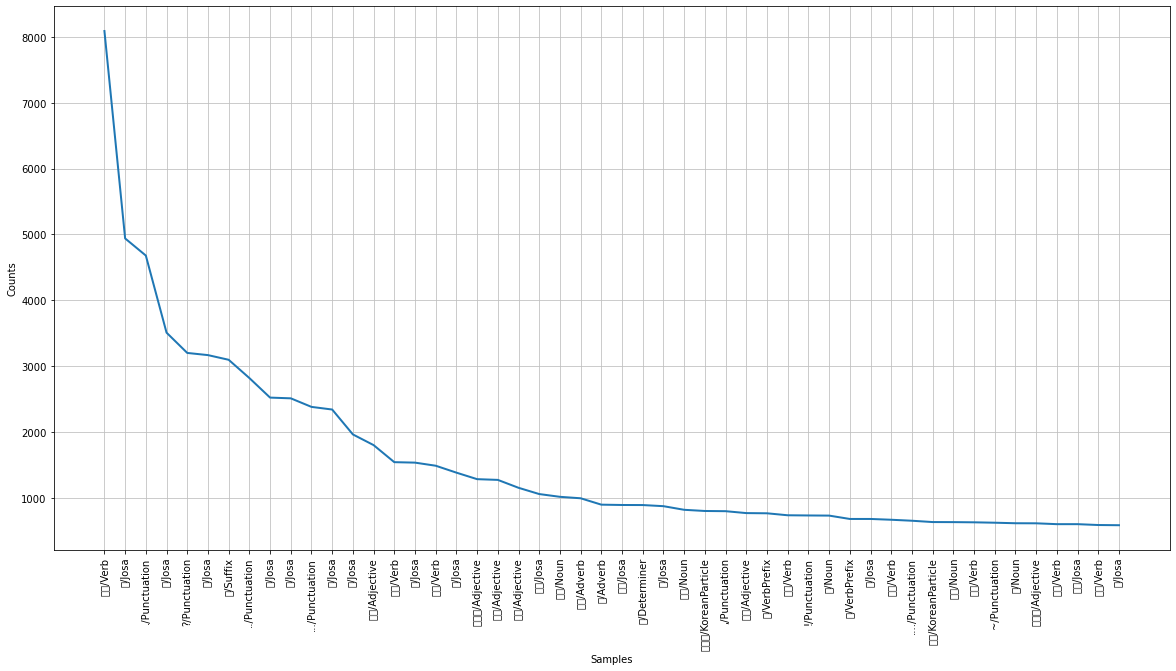

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [35]:
SURPRISE_FREQUENCY_COUNT = 2000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [36]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [37]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [38]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [39]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [40]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [41]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=50, batch_size=512) 

Epoch 1/50
53/53 [==============================] - 6s 106ms/step - loss: 0.4491 - binary_accuracy: 0.8385
Epoch 2/50
53/53 [==============================] - 1s 27ms/step - loss: 0.3506 - binary_accuracy: 0.8503
Epoch 3/50
53/53 [==============================] - 1s 10ms/step - loss: 0.3182 - binary_accuracy: 0.8658
Epoch 4/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2995 - binary_accuracy: 0.8742
Epoch 5/50
53/53 [==============================] - 0s 9ms/step - loss: 0.2841 - binary_accuracy: 0.8809
Epoch 6/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2689 - binary_accuracy: 0.8896
Epoch 7/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2530 - binary_accuracy: 0.8967
Epoch 8/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2360 - binary_accuracy: 0.9043
Epoch 9/50
53/53 [==============================] - 1s 10ms/step - loss: 0.2189 - binary_accuracy: 0.9124
Epoch 10/50
53/53 [===========================

In [42]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

362/362 [==============================] - 2s 5ms/step - loss: 1.9150 - binary_accuracy: 0.8159


In [43]:
surprise_results

[1.9149672985076904, 0.8159281611442566]

In [44]:
surprise_model.save('surprise_model.h5')

In [45]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [46]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

0.9994896650314331

In [245]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    #if(surprise_score > 0.5):
    print(f"놀람({round(surprise_score*100)}%)")
    surprise = round(surprise_score*100)
    '''
    else:
        print(f"{predict} ==> 놀람X ({round((1-surprise_score)*100)}%)") '''

In [246]:
surprise_predict("원재상")

놀람(2%)


In [49]:
#분노 감정 분석

In [50]:
import pandas as pd
train_anger_df = pd.read_csv("angertrainalldata.txt","\t")
test_anger_df = pd.read_csv("angertestalldata.txt","\t")

In [51]:
from konlpy.tag import Okt
okt_anger = Okt()

In [52]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [53]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [54]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [55]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [56]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [57]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


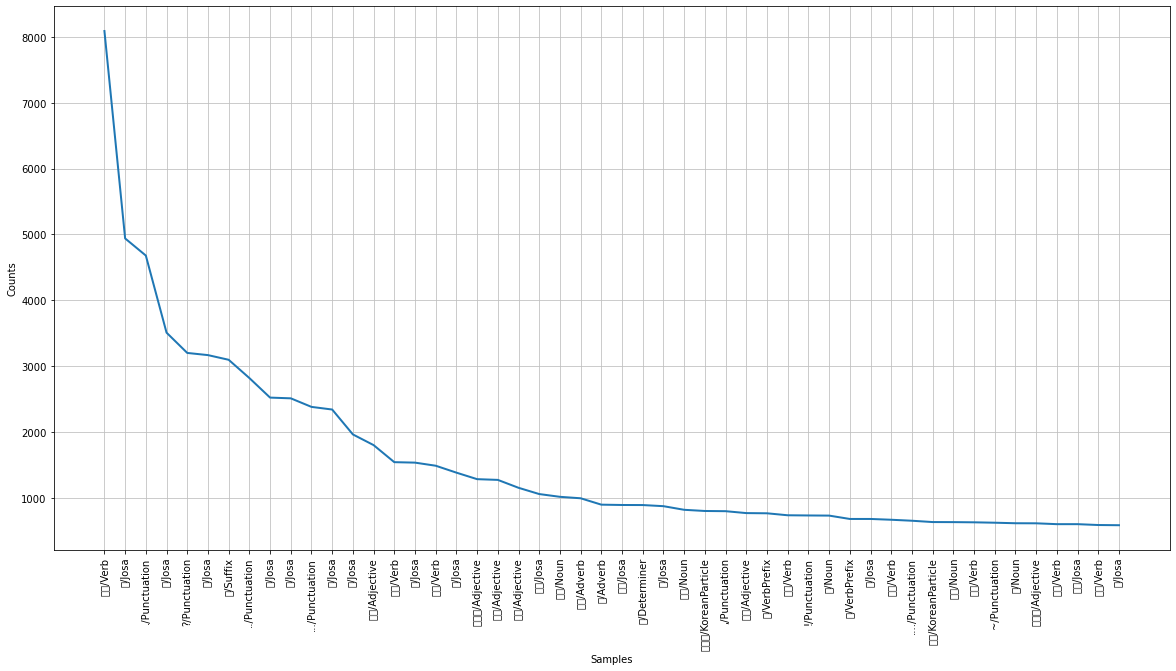

In [58]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [59]:
ANGER_FREQUENCY_COUNT = 2000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [60]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [61]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [62]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [63]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [64]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [65]:
anger_model.fit(x_anger_train, y_anger_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 5s 103ms/step - loss: 0.4428 - binary_accuracy: 0.8473
Epoch 2/50
53/53 [==============================] - 2s 35ms/step - loss: 0.3301 - binary_accuracy: 0.8580
Epoch 3/50
53/53 [==============================] - 1s 12ms/step - loss: 0.3010 - binary_accuracy: 0.8700
Epoch 4/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2850 - binary_accuracy: 0.8789
Epoch 5/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2710 - binary_accuracy: 0.8851
Epoch 6/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2577 - binary_accuracy: 0.8917
Epoch 7/50
53/53 [==============================] - 1s 11ms/step - loss: 0.2431 - binary_accuracy: 0.9005
Epoch 8/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2277 - binary_accuracy: 0.9093
Epoch 9/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2118 - binary_accuracy: 0.9164
Epoch 10/50
53/53 [==========================

In [66]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

362/362 [==============================] - 2s 5ms/step - loss: 2.0287 - binary_accuracy: 0.8225


In [67]:
anger_results

[2.0286848545074463, 0.8224928975105286]

In [68]:
anger_model.save('anger_model.h5')

In [69]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [70]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

1.0

In [252]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    #if(anger_score > 0.5):
    print(f"분노({round(anger_score*100)}%)")
    anger = round(anger_score*100)   
    '''
    else:
        print(f"{predict} ==> 분노X ({round((1-anger_score)*100)}%)") '''

In [253]:
anger_predict("분노")

분노(16%)


In [73]:
#슬픔 감정 분석

In [74]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstrainalldata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestalldata.txt","\t")

In [75]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [76]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [77]:
train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
train_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

In [78]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [79]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [80]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [81]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


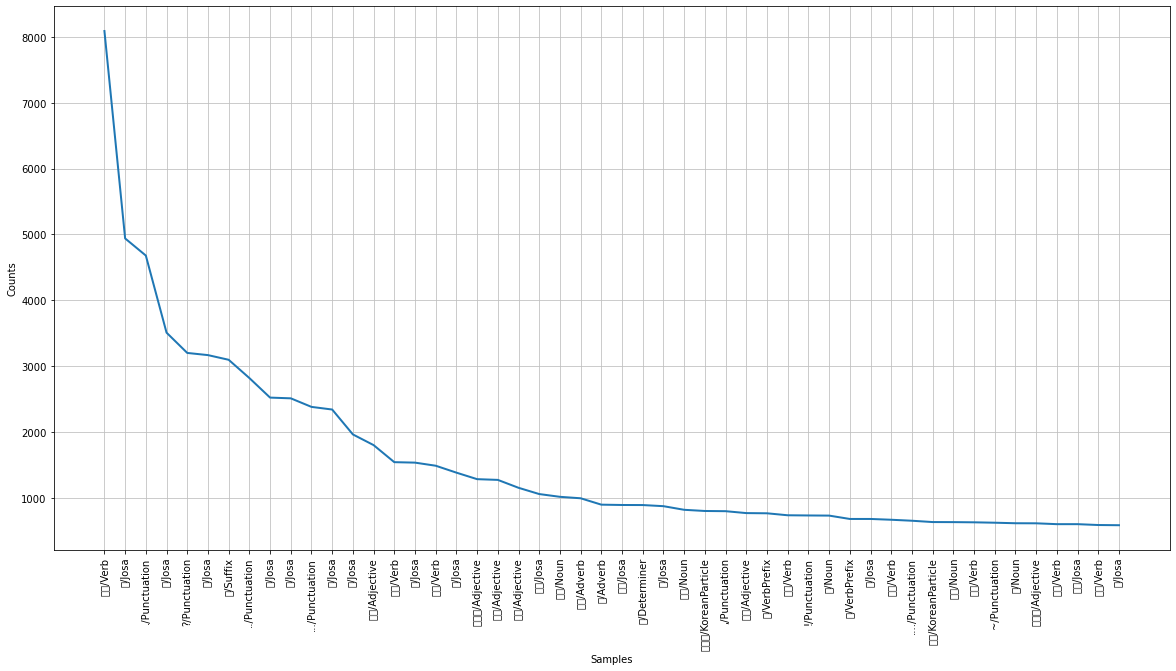

In [82]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [83]:
SADNESS_FREQUENCY_COUNT = 2000;
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [84]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [85]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [86]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [87]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [88]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [89]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 7s 123ms/step - loss: 0.4072 - binary_accuracy: 0.8627
Epoch 2/50
53/53 [==============================] - 2s 32ms/step - loss: 0.2841 - binary_accuracy: 0.8846
Epoch 3/50
53/53 [==============================] - 1s 11ms/step - loss: 0.2474 - binary_accuracy: 0.9046
Epoch 4/50
53/53 [==============================] - 1s 11ms/step - loss: 0.2286 - binary_accuracy: 0.9113
Epoch 5/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2138 - binary_accuracy: 0.9183
Epoch 6/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2005 - binary_accuracy: 0.9235
Epoch 7/50
53/53 [==============================] - 1s 12ms/step - loss: 0.1877 - binary_accuracy: 0.9291
Epoch 8/50
53/53 [==============================] - 1s 11ms/step - loss: 0.1749 - binary_accuracy: 0.9345
Epoch 9/50
53/53 [==============================] - 1s 10ms/step - loss: 0.1613 - binary_accuracy: 0.9399
Epoch 10/50
53/53 [==========================

In [90]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

362/362 [==============================] - 1s 4ms/step - loss: 1.6772 - binary_accuracy: 0.8634


In [91]:
sadness_results

[1.6771641969680786, 0.8634361028671265]

In [92]:
sadness_model.save('sadness_model.h5')

In [93]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

['너무/Adverb', '화나다/Verb']

In [94]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

2.3519322045473245e-09

In [255]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    #if(sadness_score > 0.5):
    print(f"슬픔({round(sadness_score*100)}%)")
    sad = round(sadness_score*100)
    '''
    else:
        print(f"{predict} ==> 슬픔X ({round((1-sadness_score)*100)}%)") '''

In [256]:
sadness_predict(".")

슬픔(1%)


In [97]:
#중립 감정 분석

In [98]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltrainalldata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestalldata.txt","\t")

In [99]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [100]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [101]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [102]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [103]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [104]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


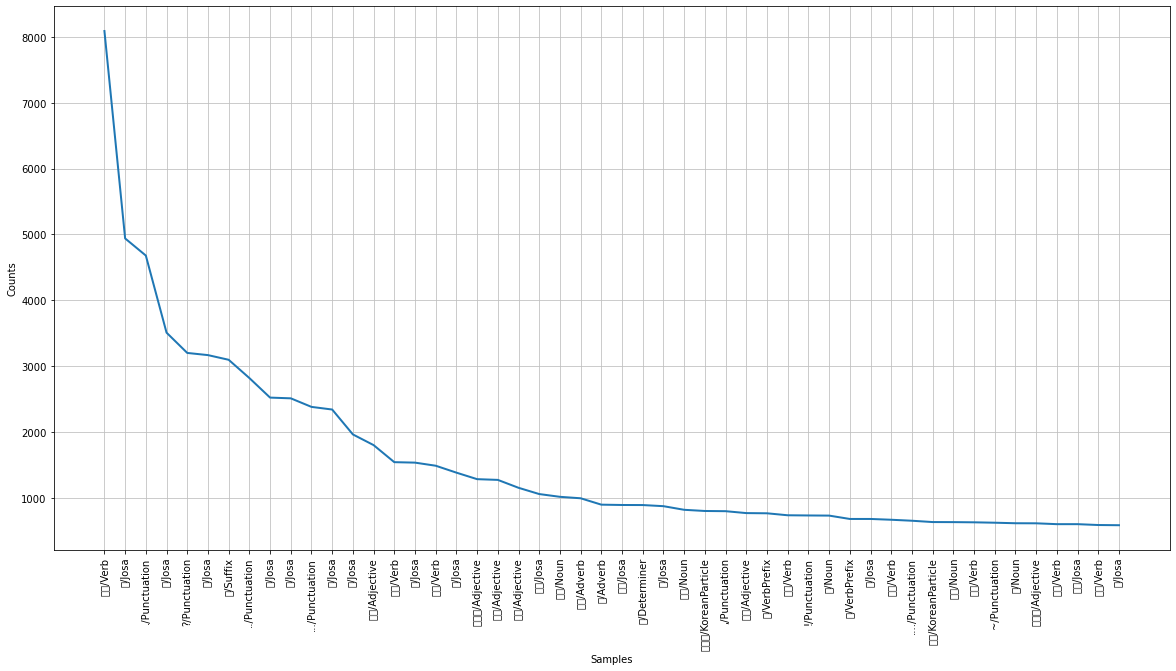

In [105]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [106]:
NEUTRAL_FREQUENCY_COUNT = 2000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [107]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [108]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [109]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [110]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [111]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [112]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 6s 107ms/step - loss: 0.4261 - binary_accuracy: 0.8629
Epoch 2/50
53/53 [==============================] - 1s 26ms/step - loss: 0.3368 - binary_accuracy: 0.8748
Epoch 3/50
53/53 [==============================] - 1s 14ms/step - loss: 0.3108 - binary_accuracy: 0.8757
Epoch 4/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2916 - binary_accuracy: 0.8823
Epoch 5/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2739 - binary_accuracy: 0.8920
Epoch 6/50
53/53 [==============================] - 1s 11ms/step - loss: 0.2546 - binary_accuracy: 0.9002
Epoch 7/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2338 - binary_accuracy: 0.9091
Epoch 8/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2120 - binary_accuracy: 0.9191
Epoch 9/50
53/53 [==============================] - 1s 13ms/step - loss: 0.1906 - binary_accuracy: 0.9291
Epoch 10/50
53/53 [==========================

In [113]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

362/362 [==============================] - 2s 6ms/step - loss: 1.8044 - binary_accuracy: 0.8215


In [114]:
neutral_results

[1.8043780326843262, 0.8214563131332397]

In [115]:
neutral_model.save('neutral_model.h5')

In [116]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

['너무/Adverb', '화나다/Verb']

In [117]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

4.8511406447460104e-08

In [266]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    #if(neutral_score > 0.5):
    print(f"중립({round(neutral_score*100)}%)")
    neutral = round(neutral_score*100)
    '''
    else:
        print(f"{predict} ==> 중립X ({round((1-neutral_score)*100)}%)") '''

In [267]:
neutral_predict("아무 생각이 없다")

중립(2%)


In [120]:
#행복 감정 분석

In [121]:
import pandas as pd
train_happy_df = pd.read_csv("happytrainalldata.txt","\t")
test_happy_df = pd.read_csv("happytestalldata.txt","\t")

In [122]:
from konlpy.tag import Okt
okt_happy = Okt()

In [123]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [124]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [125]:
print(train_happy_docs[0])
print(test_happy_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [126]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [127]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


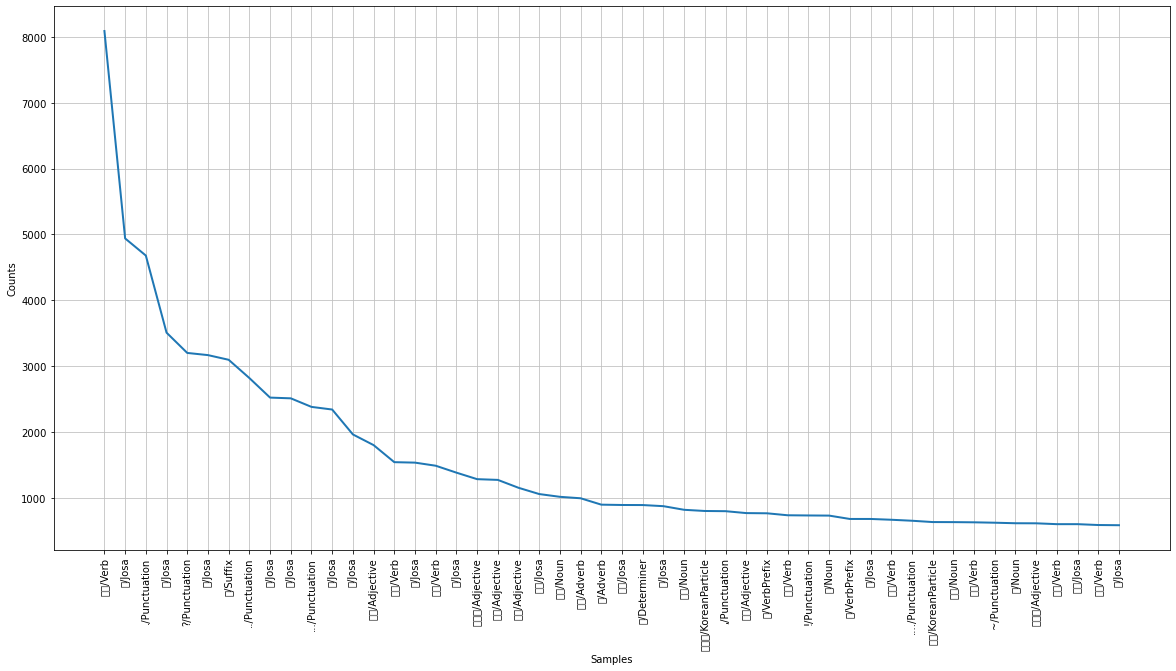

In [128]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [129]:
HAPPY_FREQUENCY_COUNT = 2000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [130]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [131]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [132]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [133]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [134]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [135]:
happy_model.fit(x_happy_train, y_happy_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 6s 113ms/step - loss: 0.3814 - binary_accuracy: 0.8543
Epoch 2/50
53/53 [==============================] - 2s 40ms/step - loss: 0.2249 - binary_accuracy: 0.9191
Epoch 3/50
53/53 [==============================] - 1s 14ms/step - loss: 0.1861 - binary_accuracy: 0.9318
Epoch 4/50
53/53 [==============================] - 1s 16ms/step - loss: 0.1694 - binary_accuracy: 0.9375
Epoch 5/50
53/53 [==============================] - 1s 16ms/step - loss: 0.1579 - binary_accuracy: 0.9417
Epoch 6/50
53/53 [==============================] - 1s 13ms/step - loss: 0.1485 - binary_accuracy: 0.9453
Epoch 7/50
53/53 [==============================] - 1s 15ms/step - loss: 0.1399 - binary_accuracy: 0.9481
Epoch 8/50
53/53 [==============================] - 1s 16ms/step - loss: 0.1317 - binary_accuracy: 0.9512
Epoch 9/50
53/53 [==============================] - 1s 15ms/step - loss: 0.1232 - binary_accuracy: 0.9552
Epoch 10/50
53/53 [==========================

In [136]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

362/362 [==============================] - 2s 6ms/step - loss: 1.6692 - binary_accuracy: 0.8853


In [137]:
happy_results

[1.6692109107971191, 0.8852897882461548]

In [138]:
happy_model.save('happy_model.h5')

In [139]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

['너무/Adverb', '화나다/Verb']

In [140]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

8.880969107849523e-05

In [268]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    #if(happy_score > 0.5):
    print(f"행복({round(happy_score*100)}%)")
    happy = round(happy_score*100)
    '''
    else:
        print(f"{predict} ==> 행복X ({round((1-happy_score)*100)}%)") '''

In [269]:
happy_predict("너무해")

행복(0%)


In [143]:
#혐오 감정 분석

In [144]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttrainalldata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestalldata.txt","\t")

In [145]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [146]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [147]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [148]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [149]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [150]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


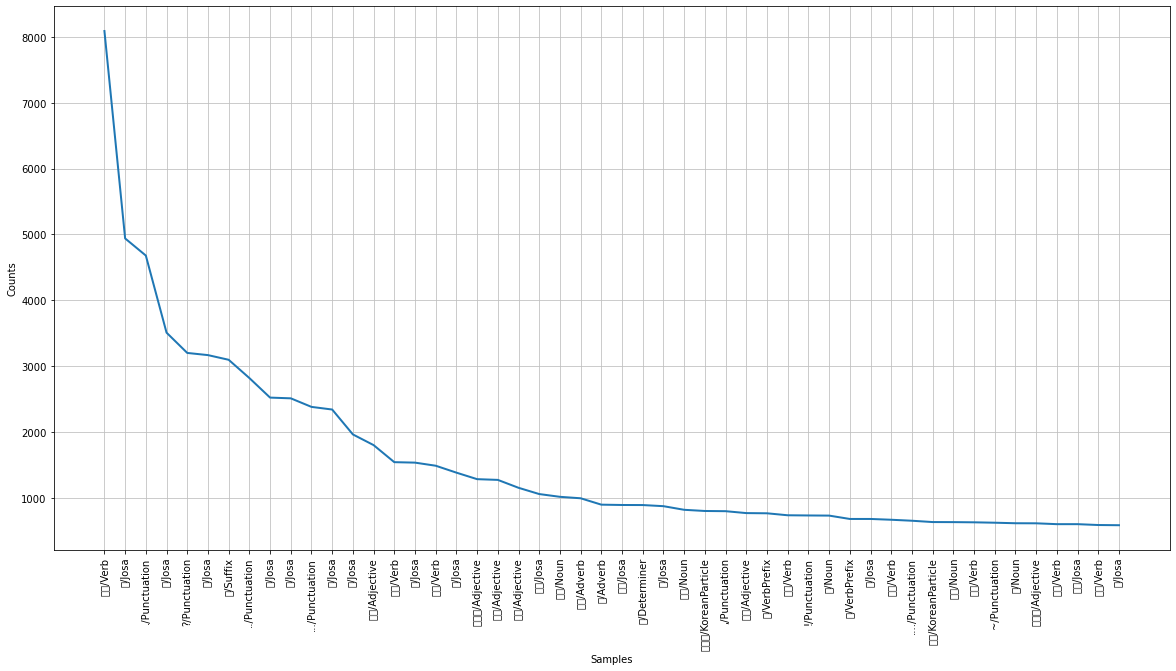

In [151]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [152]:
DISGUST_FREQUENCY_COUNT = 2000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [153]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [154]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [155]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [156]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [157]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [158]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 5s 102ms/step - loss: 0.4500 - binary_accuracy: 0.8509
Epoch 2/50
53/53 [==============================] - 2s 35ms/step - loss: 0.3553 - binary_accuracy: 0.8594
Epoch 3/50
53/53 [==============================] - 1s 16ms/step - loss: 0.3264 - binary_accuracy: 0.8633
Epoch 4/50
53/53 [==============================] - 1s 16ms/step - loss: 0.3072 - binary_accuracy: 0.8706
Epoch 5/50
53/53 [==============================] - 1s 16ms/step - loss: 0.2895 - binary_accuracy: 0.8799
Epoch 6/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2713 - binary_accuracy: 0.8896
Epoch 7/50
53/53 [==============================] - 1s 16ms/step - loss: 0.2526 - binary_accuracy: 0.9007
Epoch 8/50
53/53 [==============================] - 1s 16ms/step - loss: 0.2321 - binary_accuracy: 0.9106
Epoch 9/50
53/53 [==============================] - 1s 16ms/step - loss: 0.2108 - binary_accuracy: 0.9204
Epoch 10/50
53/53 [==========================

In [159]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

362/362 [==============================] - 2s 6ms/step - loss: 2.9813 - binary_accuracy: 0.7840


In [160]:
disgust_results

[2.9813103675842285, 0.7839682102203369]

In [161]:
disgust_model.save('disgust_model.h5')

In [162]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

['너무/Adverb', '화나다/Verb']

In [163]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

0.0008154285605996847

In [270]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    #if(disgust_score > 0.5):
    print(f"혐오({round(disgust_score*100)}%)")
    disgust = round(disgust_score*100)
    '''
    else:
        print(f"{predict} ==> 혐오X ({round((1-disgust_score)*100)}%)") '''

In [271]:
disgust_predict("원재상")

혐오(0%)


In [348]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
def predict(predict):
    fear_predict(predict)
    disgust_predict(predict)
    sadness_predict(predict)
    happy_predict(predict)
    anger_predict(predict)
    neutral_predict(predict)
    surprise_predict(predict)
    '''x = np.arange(7)
    감정 = ['fear','disgust','sadness','happy','anger','neutral','surprise']
    정확도 = [ fear, disgust, sadness, happy, anger, neutral, surprise]
    plt.bar(x, 정확도)
    plt.xticks(x,감정)
    plt.show()'''

In [4]:
predict(".")

NameError: name 'predict' is not defined